In [57]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [58]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
session.query(measurement.date).\
    filter(measurement.date > '2016-08-23').order_by(measurement.date).all()

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, func.avg(measurement.prcp)]

Yr_query = session.query(*sel).\
    filter(measurement.date > '2016-08-23').group_by(measurement.date).order_by(measurement.date).all()

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Yr_query_df = pd.DataFrame(Yr_query, columns = ['date', 'prcp'])
Yr_query_df.set_index('date', inplace =True)

# Sort the dataframe by date
Yr_query_df.sort_values(by='date', ascending=False)

Yr_query_df

,prcp
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


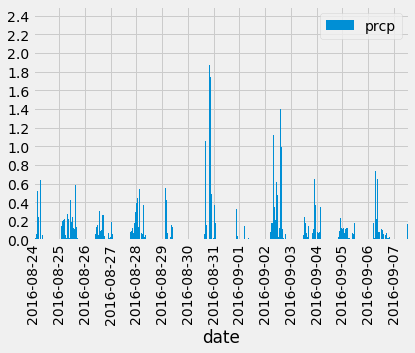

<Figure size 432x288 with 0 Axes>

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data

Yr_query_df.plot(kind='bar', rot=90)
plt.locator_params(nbins=15)
plt.show()
plt.tight_layout()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Yr_query_df.describe()

,prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
session.query(measurement).group_by(measurement.station).count()

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
q1 = session.query(station.station.distinct())

q1.all()


[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [18]:
USC00519397 = session.query(measurement.station).filter(measurement.station == 'USC00519397').count()
USC00513117 = session.query(measurement.station).filter(measurement.station == 'USC00513117').count()
USC00514830 = session.query(measurement.station).filter(measurement.station == 'USC00514830').count()
USC00517948 = session.query(measurement.station).filter(measurement.station == 'USC00517948').count()
USC00518838 = session.query(measurement.station).filter(measurement.station == 'USC00518838').count()
USC00519523 = session.query(measurement.station).filter(measurement.station == 'USC00519523').count()
USC00519281 = session.query(measurement.station).filter(measurement.station == 'USC00519281').count()
USC00511918 = session.query(measurement.station).filter(measurement.station == 'USC00511918').count()
USC00516128 = session.query(measurement.station).filter(measurement.station == 'USC00516128').count()

print(f' USC00519397 has {USC00519397} reports')
print(f' USC00513117 has {USC00513117} reports')
print(f' USC00514830 has {USC00514830} reports')
print(f' USC00517948 has {USC00517948} reports')
print(f' USC00518838 has {USC00518838} reports')
print(f' USC00519523 has {USC00519523} reports')
print(f' USC00519281 has {USC00519281} reports')
print(f' USC00511918 has {USC00511918} reports')
print(f' USC00516128 has {USC00516128} reports')

 USC00519397 has 2724 reports
 USC00513117 has 2709 reports
 USC00514830 has 2202 reports
 USC00517948 has 1372 reports
 USC00518838 has 511 reports
 USC00519523 has 2669 reports
 USC00519281 has 2772 reports
 USC00511918 has 1979 reports
 USC00516128 has 2612 reports


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]

data = session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.id).desc()).first()

data





(54.0, 85.0, 71.66378066378067)

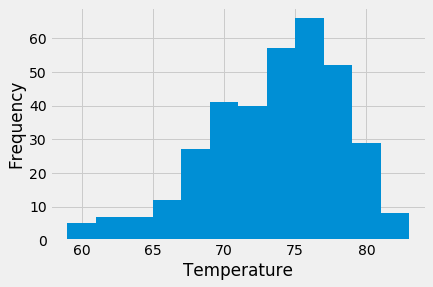

In [75]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

data_ = session.query(measurement.date, measurement.tobs).filter(measurement.station == "USC00519281").\
filter(measurement.date > '2016-08-23').order_by(measurement.date.desc()).all()

hist_df = pd.DataFrame(data_, columns= ['Date', 'tobs'])
hist_df.set_index('Date', inplace=True)
hist = hist_df.hist(bins=12)
hist = hist[0]
for x in hist:
    x.set_title('')
    x.set_xlabel('Temperature')
    x.set_ylabel('Frequency')

# Close session

In [ ]:
# Close Session
session.close()